In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv('heart.csv')

In [3]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
200,44,1,0,110,197,0,0,177,0,0.0,2,1,2,0
182,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0


In [4]:
# Cleaning the data
data.isnull().sum() # there are no null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# Check for missing values
data.duplicated().sum() # Check for duplicates
data.drop_duplicates(inplace=True)  # Remove duplicates

# performing Exploratory Data Analysis (EDA)

In [6]:

data.describe()  # Get a statistical summary of the dataset
 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.info() # Get information about the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


C:\Users\Rafy Mustafa\AppData\Local\Temp\ipykernel_5416\535127621.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data = data, palette='Set2')


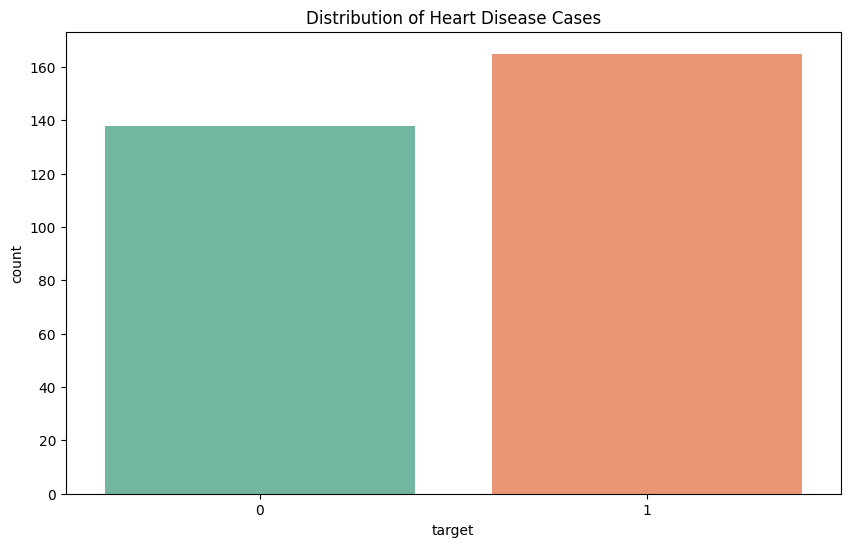

In [27]:
plt.figure(figsize = (10, 6))
sns.countplot(x='target', data = data, palette='Set2')
plt.title('Distribution of Heart Disease Cases')
plt.show()

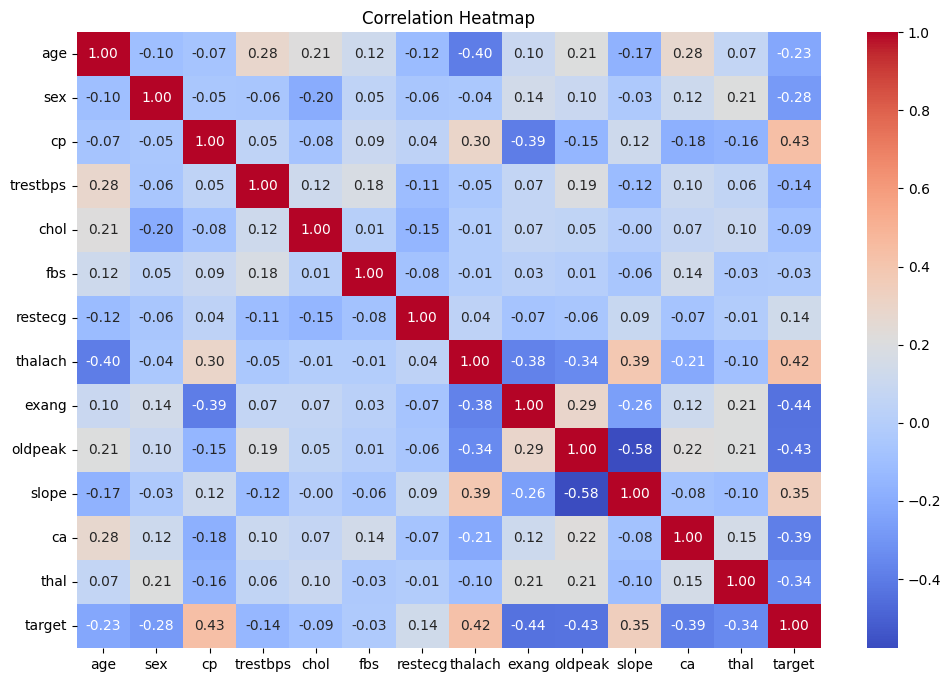

In [28]:
# Visualizing the distribution of features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Performing Train Test Split 

In [29]:
from sklearn.model_selection import train_test_split

x = data.drop('target', axis=1)  # Features
y = data['target']  # Target variable

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [30]:
print(f"X train shape : {X_train.shape}, X test shape :  {X_test.shape}, Y train shape :  {Y_train.shape}, Y test shape : {Y_test.shape}")

X train shape : (242, 13), X test shape :  (61, 13), Y train shape :  (242,), Y test shape : (61,)


# Performing Scaling Features :

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
X_train_scaled

array([[-1.35679832,  0.72250438,  0.00809909, ...,  0.95390513,
        -0.68970073, -0.50904773],
       [ 0.38508599,  0.72250438, -0.97189094, ...,  0.95390513,
        -0.68970073,  1.17848036],
       [-0.92132724,  0.72250438,  0.98808912, ..., -0.69498803,
        -0.68970073, -0.50904773],
       ...,
       [ 1.58263146,  0.72250438,  1.96807914, ..., -0.69498803,
         0.32186034, -0.50904773],
       [-0.92132724,  0.72250438, -0.97189094, ...,  0.95390513,
        -0.68970073,  1.17848036],
       [ 0.92942484, -1.38407465,  0.00809909, ...,  0.95390513,
         1.33342142, -0.50904773]], shape=(242, 13))

# Training Models (LogisticRegression and DecisionTrees)

In [33]:
# logistic regression and Decision Tree Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Train a Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, Y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [34]:
# Train a Decision Tree Classifier model

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)  # Using unscaled data for Decision Tree as it is not sensitive to feature scaling

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [37]:
# Evaluating the models
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay

def evaluate_model(model, X_test, y_test, title=""):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    roc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])

    print(f"\n {title} Accuracy: {acc:.2f}")
    print(f" ROC AUC: {roc:.2f}")

    ConfusionMatrixDisplay(cm).plot(cmap='Blues')
    plt.title(f"{title} - Confusion Matrix")
    plt.show()

    plt.plot(fpr, tpr, label=f"{title} (AUC = {roc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{title} - ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()


 Logistic Regression Accuracy: 0.85
 ROC AUC: 0.93


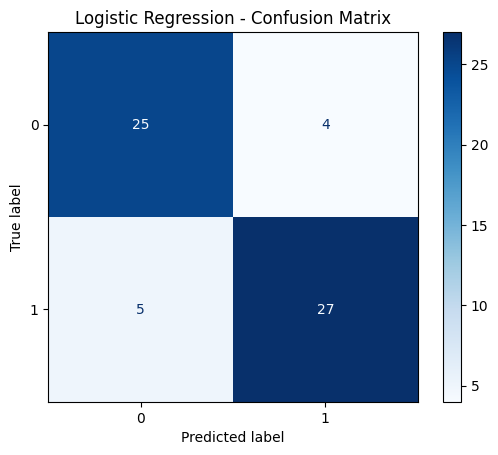

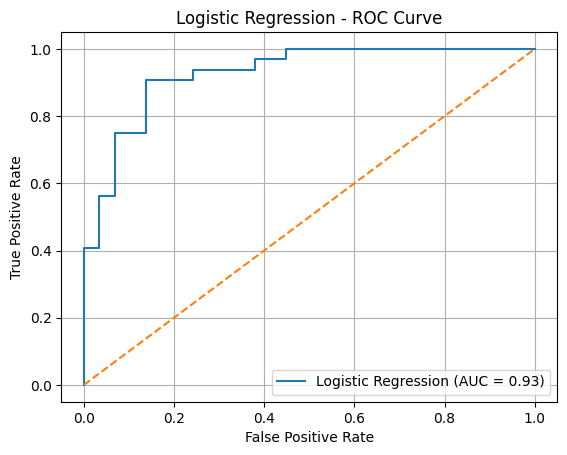

In [38]:
# Evaluating Linear Regression model
evaluate_model(lr_model, X_test_scaled, Y_test, "Logistic Regression")



 Decision Tree Classifier Accuracy: 0.82
 ROC AUC: 0.82


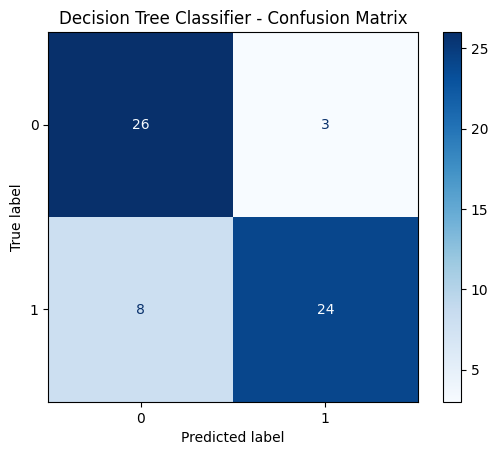

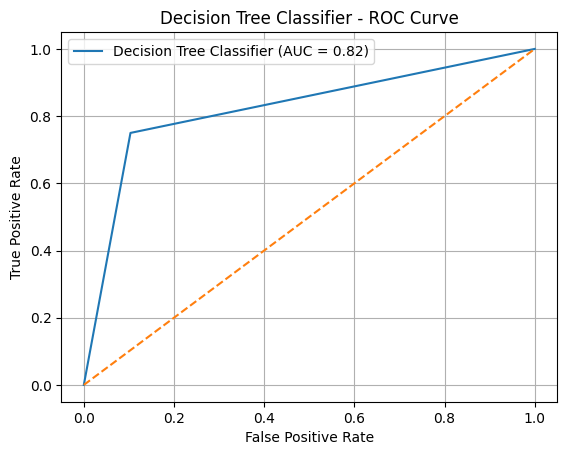

In [39]:
# Evaluating Decision Tree Classifier model
evaluate_model(dt_model, X_test, Y_test, 'Decision Tree Classifier')

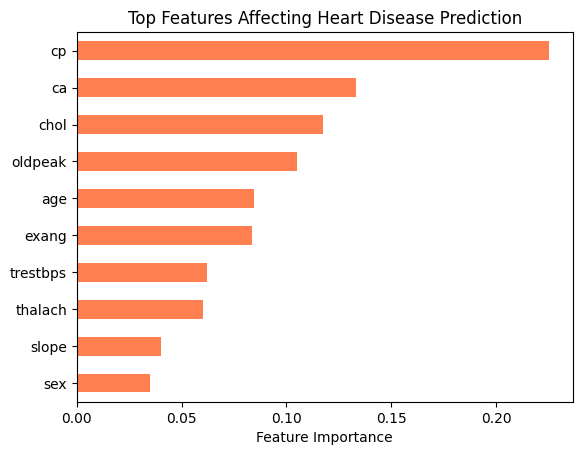

In [41]:
# 🔍 Step 9: Feature importance
feat_importance = pd.Series(dt_model.feature_importances_, index=X_train.columns)
feat_importance.nlargest(10).plot(kind='barh', color='coral')
plt.title('Top Features Affecting Heart Disease Prediction')
plt.xlabel('Feature Importance')
plt.gca().invert_yaxis()
plt.show()